# Homework 3: Improving the Pipeline
- Using outcomes and projects data from the donors choose database from 2011-2013
- The goal is to predict, at posting time of a project, if a project will not get fully funded so we can intervene and help them improve the project listing. 

In [1]:
import pandas as pd
from datetime import datetime, timedelta

In [2]:
%run preprocess.py
%run models.py
%load_ext autoreload
%autoreload 2

In [ ]:
#outcomes = read_file('data/outcomes.csv', index='projectid')
#projects = read_file('data/projects.csv', index='projectid')
#outcomes = outcomes.fully_funded.to_frame()
#joined = join_df(outcomes, projects)
#joined.date_posted = pd.to_datetime(joined.date_posted)
#df = joined[(joined.date_posted <= datetime(2013, 12, 31)) & (joined.date_posted >= datetime(2011, 1, 1))]
#df.to_pickle('data/joined2011_2013.pkl')

In [3]:
df = read_file('data/joined2011_2013.pkl')

In [4]:
copy = df.copy()

/Users/hyeyeonchang/Documents/Spring-2018/Machine-Learning/machine-learning-2018/hw3/preprocess.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].apply(lambda x: 1 if x == val else 0)
/Users/hyeyeonchang/Documents/Spring-2018/Machine-Learning/machine-learning-2018/hw3/preprocess.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col_name] = df[col].apply(lambda x: 1 if x == val else 0)
/Users/hyeyeonchang/Documents/Spring-2018/Machine-Learning/machine-learning-2018/hw3/preprocess.py:219: SettingWithCopyWarning: 


GB


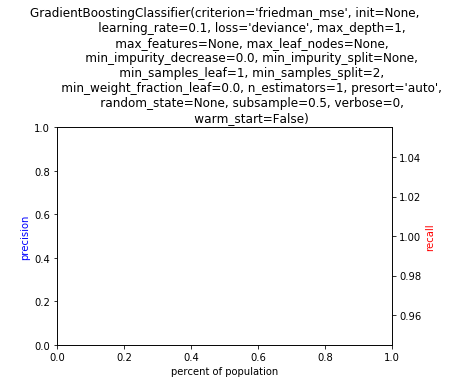

RF


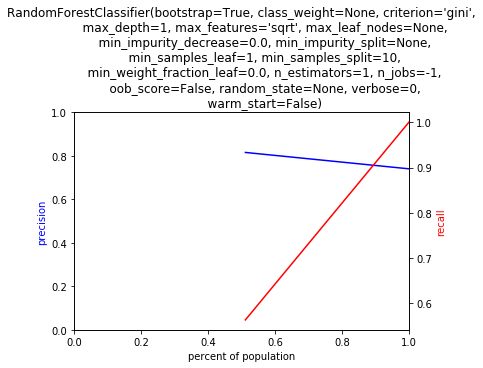

DT


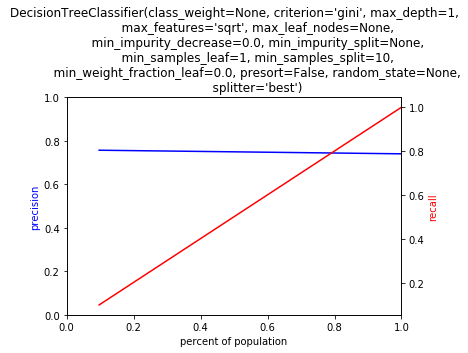

KNN


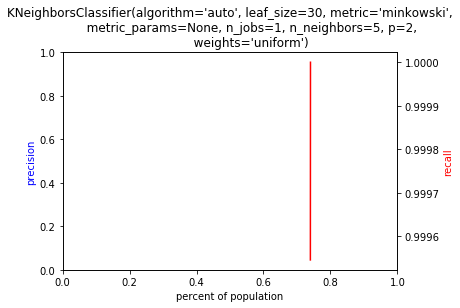

LR


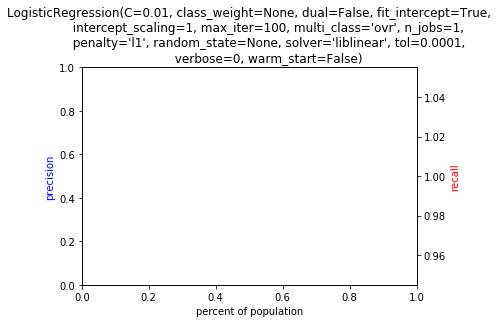

NB


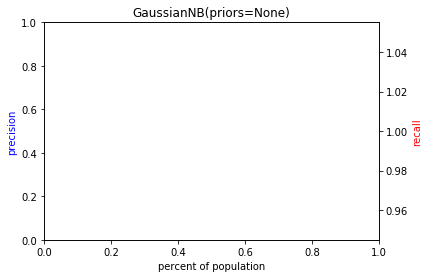

/Users/hyeyeonchang/Documents/Spring-2018/Machine-Learning/machine-learning-2018/hw3/preprocess.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].apply(lambda x: 1 if x == val else 0)
/Users/hyeyeonchang/Documents/Spring-2018/Machine-Learning/machine-learning-2018/hw3/preprocess.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col_name] = df[col].apply(lambda x: 1 if x == val else 0)
/Users/hyeyeonchang/Documents/Spring-2018/Machine-Learning/machine-learning-2018/hw3/preprocess.py:219: SettingWithCopyWarning: 


GB


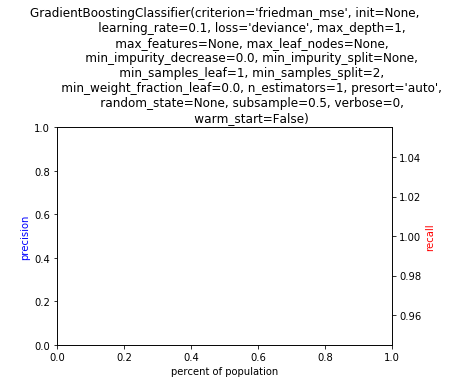

RF


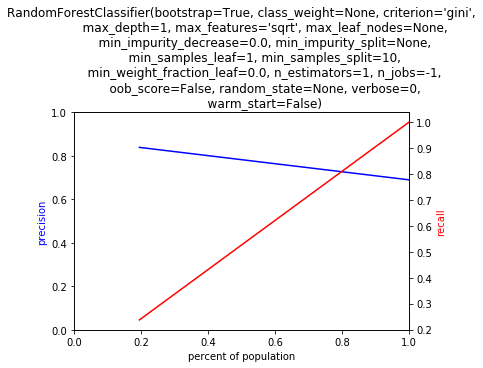

DT


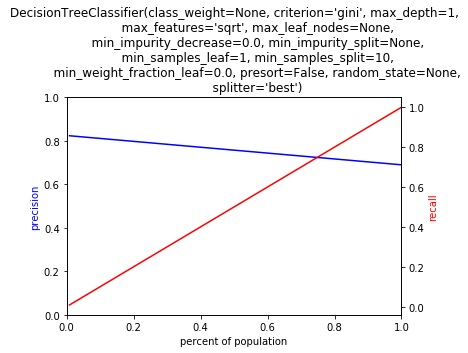

KNN


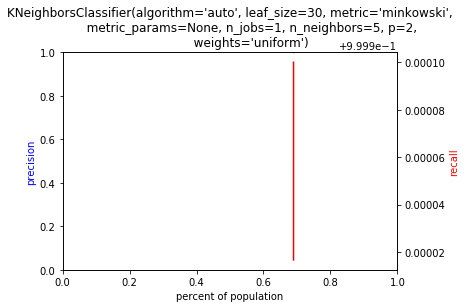

LR


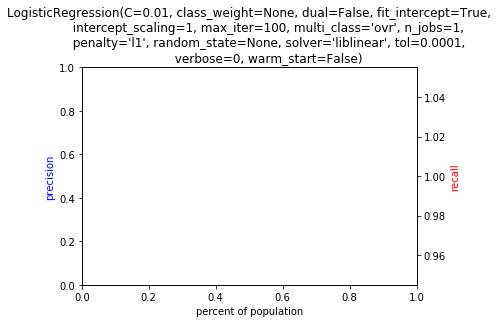

NB


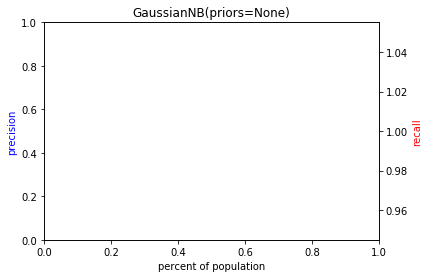

/Users/hyeyeonchang/Documents/Spring-2018/Machine-Learning/machine-learning-2018/hw3/preprocess.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].apply(lambda x: 1 if x == val else 0)
/Users/hyeyeonchang/Documents/Spring-2018/Machine-Learning/machine-learning-2018/hw3/preprocess.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col_name] = df[col].apply(lambda x: 1 if x == val else 0)
/Users/hyeyeonchang/Documents/Spring-2018/Machine-Learning/machine-learning-2018/hw3/preprocess.py:219: SettingWithCopyWarning: 


GB


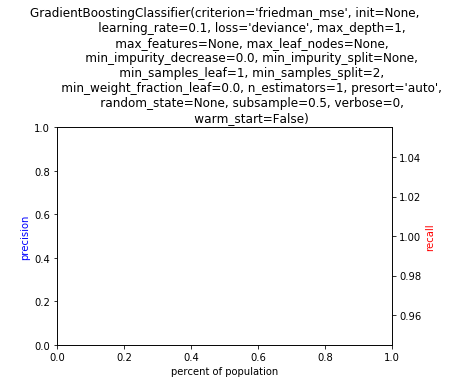

RF


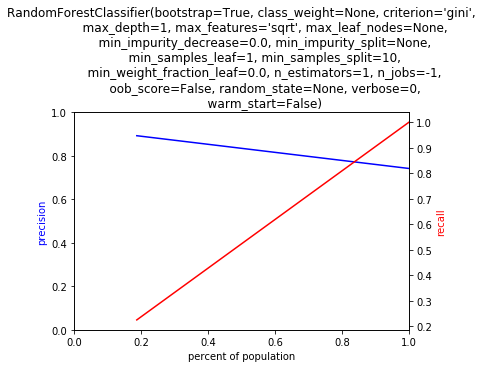

DT


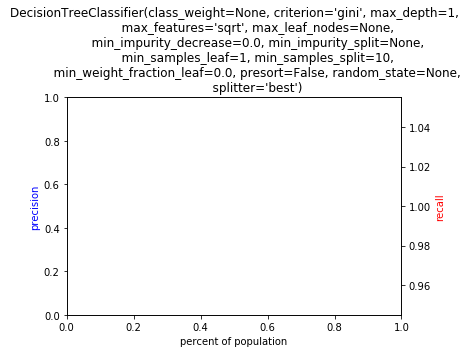

KNN


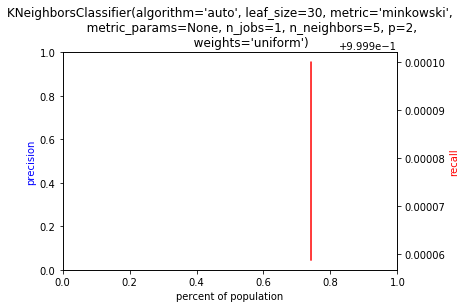

LR


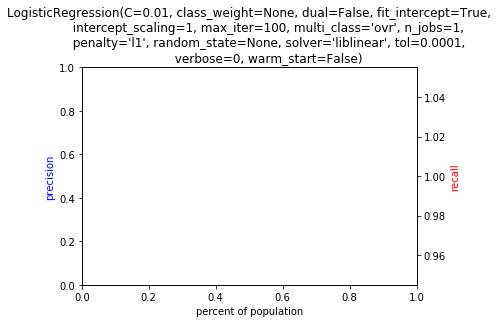

NB


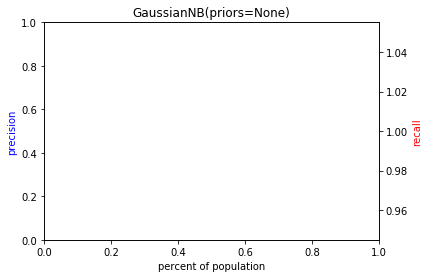

/Users/hyeyeonchang/Documents/Spring-2018/Machine-Learning/machine-learning-2018/hw3/preprocess.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].apply(lambda x: 1 if x == val else 0)
/Users/hyeyeonchang/Documents/Spring-2018/Machine-Learning/machine-learning-2018/hw3/preprocess.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col_name] = df[col].apply(lambda x: 1 if x == val else 0)
/Users/hyeyeonchang/Documents/Spring-2018/Machine-Learning/machine-learning-2018/hw3/preprocess.py:219: SettingWithCopyWarning: 


GB


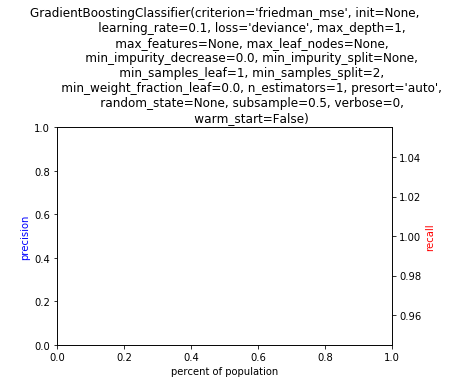

RF


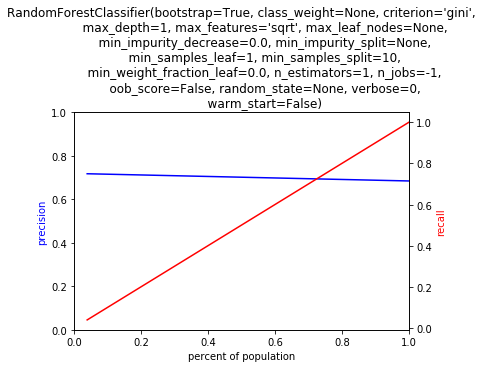

DT


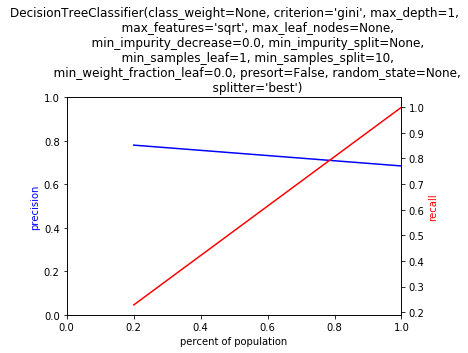

KNN


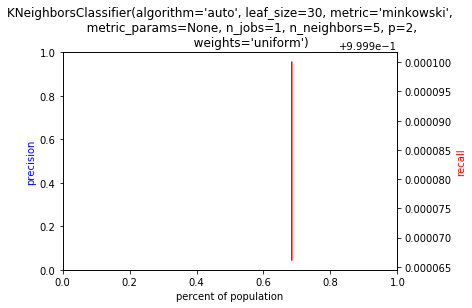

LR


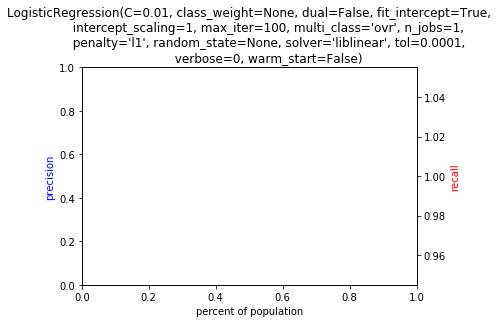

NB


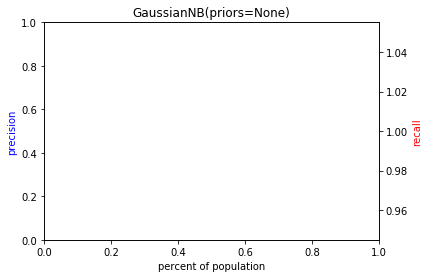

/Users/hyeyeonchang/Documents/Spring-2018/Machine-Learning/machine-learning-2018/hw3/preprocess.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].apply(lambda x: 1 if x == val else 0)
/Users/hyeyeonchang/Documents/Spring-2018/Machine-Learning/machine-learning-2018/hw3/preprocess.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col_name] = df[col].apply(lambda x: 1 if x == val else 0)
/Users/hyeyeonchang/Documents/Spring-2018/Machine-Learning/machine-learning-2018/hw3/preprocess.py:219: SettingWithCopyWarning: 


GB


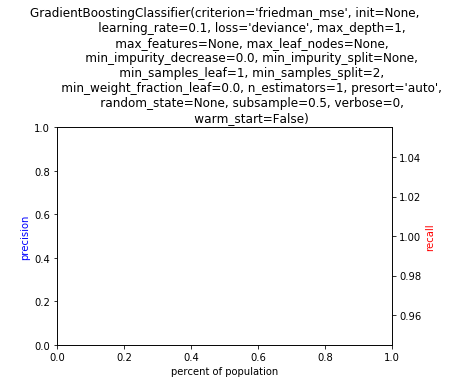

RF


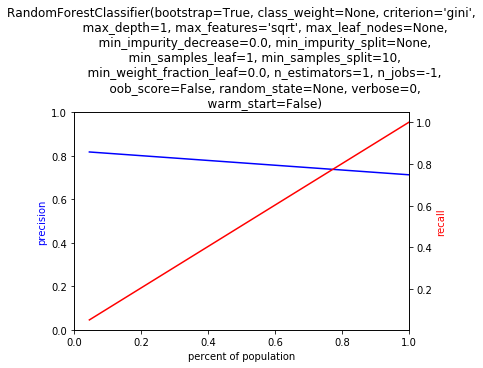

DT


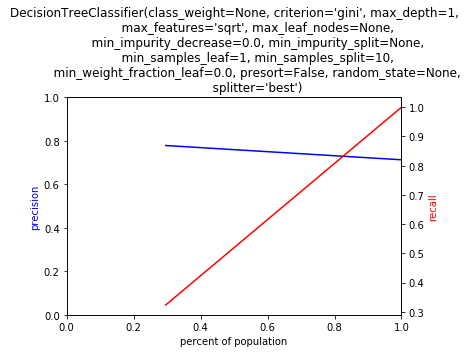

KNN


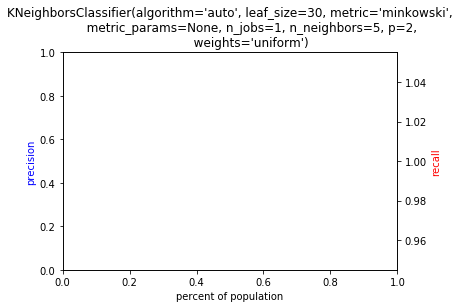

LR


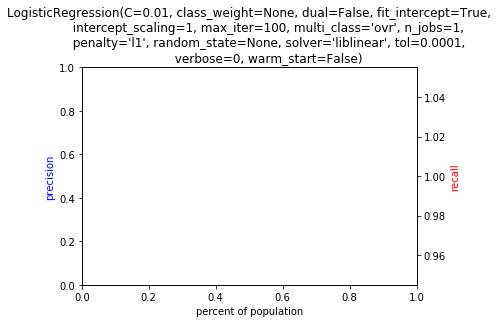

NB


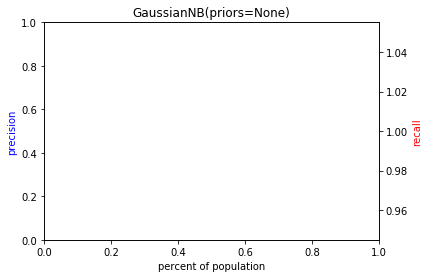

In [5]:
results = tempura_validation_loop(df, TEST_GRID)

In [ ]:
classifiers_loop(x_train, x_test, y_train, y_test,
                    grid_size=TEST_GRID)

In [7]:
results.to_pickle('data/prelim_results.pkl')

In [10]:
results

,model_type,clf,parameters,validation_date,train_set_size,validation_set_size,baseline,precision_at_5,precision_at_10,precision_at_20,recall_at_5,recall_at_10,recall_at_20,auc-roc
0,GB,([DecisionTreeRegressor(criterion='friedman_ms...,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",2011-12-31,47754,56442,"(0.74035292867, 0.74035292867, 1.0)",1.000000,1.000000,1.000000,0.067533,0.135066,0.270132,1.000000
1,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 1, 'max_features': 'sqrt', 'min_...",2011-12-31,47754,56442,"(0.74035292867, 0.74035292867, 1.0)",1.000000,1.000000,1.000000,0.067533,0.135066,0.270132,0.600188
2,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 1, 'max_fea...",2011-12-31,47754,56442,"(0.74035292867, 0.74035292867, 1.0)",1.000000,0.764174,0.882087,0.067533,0.103214,0.238280,0.504174
3,KNN,"KNeighborsClassifier(algorithm='auto', leaf_si...","{'algorithm': 'auto', 'n_neighbors': 5, 'weigh...",2011-12-31,47754,56442,"(0.74035292867, 0.74035292867, 1.0)",1.000000,1.000000,1.000000,0.067533,0.135066,0.270132,1.000000
4,LR,"LogisticRegression(C=0.01, class_weight=None, ...","{'C': 0.01, 'penalty': 'l1'}",2011-12-31,47754,56442,"(0.74035292867, 0.74035292867, 1.0)",1.000000,1.000000,1.000000,0.067533,0.135066,0.270132,1.000000
5,NB,GaussianNB(priors=None),{},2011-12-31,47754,56442,"(0.74035292867, 0.74035292867, 1.0)",1.000000,1.000000,1.000000,0.067533,0.135066,0.270132,1.000000
6,GB,([DecisionTreeRegressor(criterion='friedman_ms...,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",2012-06-30,104196,52185,"(0.689776755773, 0.689776755773, 1.0)",1.000000,1.000000,1.000000,0.072480,0.144961,0.289949,1.000000
7,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 1, 'max_features': 'sqrt', 'min_...",2012-06-30,104196,52185,"(0.689776755773, 0.689776755773, 1.0)",1.000000,1.000000,0.842963,0.072480,0.144961,0.244416,0.567976
8,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 1, 'max_fea...",2012-06-30,104196,52185,"(0.689776755773, 0.689776755773, 1.0)",0.969337,0.984668,0.992335,0.070258,0.142738,0.287726,0.502710
9,KNN,"KNeighborsClassifier(algorithm='auto', leaf_si...","{'algorithm': 'auto', 'n_neighbors': 5, 'weigh...",2012-06-30,104196,52185,"(0.689776755773, 0.689776755773, 1.0)",1.000000,1.000000,1.000000,0.072480,0.144961,0.289949,1.000000


In [ ]:
'''
class Pipeline:
    def __init__():
        self.df = None
        self.features
        self.predicted
'''

# DATA CLEANING AGENDA

class Features:
    def __init__(self, filename, binary, categorical, continuous,
                geographical, id, pred, features):
        self.df = self.read_file(filename)
        self.binary = binary
        self.categorical = categorical
        self.numeric = continuous
        self.geography = geographical
        self.id = id
        self.missing = []

    def read_file(self, filename, index=None):
        '''
        Reads file into pandas df
        '''
        ext = path.split(filename)[-1].split('.')[-1]

        if ext == 'csv':
            return pd.read_csv(filename, index_col=index)
        elif ext == 'xls':
            return pd.read_excel(filename, index_col=index)
        elif ext == 'pkl':
            return pd.read_pickle(filename)
        else:
            print("Not a valid filetype")

    def check_missing(self):
        '''
        Print column names,  number of missing rows
        for columns with missing values
        '''
        print("Missing Values:")
        for col in df.columns:
            if self.df[col].isnull().any():
                num_missing = df[col].isnull().sum()
                print(col, num_missing, self.df[col].dtype)
                self.missing.append(col)
